# CIFAR10 DataModule Unit Tests

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## General Imports

In [2]:
import os
import matplotlib.pyplot as plt
import PIL as Image
import numpy as np
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

In [3]:
from cifar10 import CIFAR10DataModule

## CIFAR-10 DataModule Instance

In [4]:
cifar10_ds_module = CIFAR10DataModule(data_dir='~/Datasets/',
                                      img_size=(32, 32),
                                      batch_size=16,
                                      valid_size=0.2,
                                      num_workers=10,
                                      seed=9290,
                                      pin_memory=True,
                                      shuffle=True,
                                      drop_last=False,
                                      transforms_type='default')

Download CIFAR10 Data:

## Prepare Download Data

In [5]:
cifar10_ds_module.prepare_data()

Files already downloaded and verified
Files already downloaded and verified


## Setup Dataset Splits

In [6]:
cifar10_ds_module.setup(stage="fit")
cifar10_ds_module.setup(stage="valid")

In [7]:
print("CIFAR-10 Classes:", cifar10_ds_module.ds_cifar10_train_valid.classes)
print("CIFAR-10 Number of Classes:", len(cifar10_ds_module.ds_cifar10_train_valid.classes))

CIFAR-10 Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
CIFAR-10 Number of Classes: 10


## Get Dataloaders

In [9]:
cifar10_train_loader = cifar10_ds_module.train_dataloader()
cifar10_valid_loader = cifar10_ds_module.val_dataloader()

In [10]:
print("Number of Training Batches:", len(cifar10_train_loader))
print("Number of Validation Batches:", len(cifar10_valid_loader))

Number of Training Batches: 2500
Number of Validation Batches: 625


In [29]:
dataiter_train = iter(cifar10_train_loader)
dataiter_valid = iter(cifar10_valid_loader)

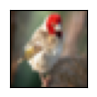

In [33]:
samp, lbl = next(dataiter_train)
cifar10_ds_module.unprocess_image(samp[1], plot=True)

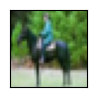

In [37]:
samp, lbl = next(dataiter_valid)
cifar10_ds_module.unprocess_image(samp[1], plot=True)